**Estimating Code Style Issue**

# Dataset

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import arange

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from scipy import stats
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://raw.githubusercontent.com/k4ilham/Tugas-Paper-Kelompok-3---Software-Engineering/main/dataset.csv'
df = pd.read_csv(url, encoding='latin1')

In [3]:
df.head(5)

,project_name,web_url,data_release,about,languages,watch,fork,star,brances,tags,...,duplication,branch,severity_minor,severity_medium,severity_critical,grade,security.1,performance.1,error_prone,code_style
0,pytorch / vision,Releases · pytorch/vision (github.com),05-Oct-23,"Datasets, Transforms and Models specific to Co...",Python,398,6800,14800,108,113,...,31%,1,882,506,50,A,108,5,1,1324
1,opencv,opencv/opencv: Open Source Computer Vision Lib...,04-Jul-13,Open Source Computer Vision Library,C++,2700,55700,72400,6,123,...,28%,1,11843,1941,608,A,550,233,907,12625
2,mmcv,open-mmlab/mmcv: OpenMMLab Computer Vision Fou...,03-Aug-20,OpenMMLab Computer Vision Foundation,Python,87,1600,5300,10,106,...,32%,1,349,68,29,A,16,30,16,384
3,AliceVision,alicevision/AliceVision: Photogrammetric Compu...,09-Aug-18,Photogrammetric Computer Vision Framework,C++,133,770,2700,121,22,...,35%,1,832,638,15,A,54,22,37,1372
4,computervision-recipes,microsoft/computervision-recipes: Best Practic...,01-Oct-19,"Best Practices, code samples, and documentatio...",Jupyter Notebook,288,1200,9200,28,3,...,16%,1,2390,1292,87,B,83,0,30,3656


In [4]:
df.shape

(30, 40)

In [5]:
df.groupby('languages').describe()

watch                                                    \
                 count   mean          std    min     25%    50%     75%   
languages                                                                  
C                  2.0  255.5   139.300036  157.0  206.25  255.5  304.75   
C++                5.0  676.4  1134.901449   40.0  133.00  235.0  274.00   
Go                 1.0  151.0          NaN  151.0  151.00  151.0  151.00   
Java               2.0   93.5    33.234019   70.0   81.75   93.5  105.25   
JavaScript         1.0  290.0          NaN  290.0  290.00  290.0  290.00   
Jupyter Notebook   4.0   98.0   126.796425   28.0   32.50   38.0  103.50   
Python            15.0  108.4   106.292588   20.0   39.50   69.0  127.50   

                          fork                ... error_prone         \
                     max count          mean  ...         75%    max   
languages                                     ...                      
C                  354.0   2.0   1226.000000  ...       80.25  105.0   
C++               2700.0   5.0  11802.400000  ...      101.00  907.0   
Go                 151.0   1.0    870.000000  ...        2.00    2.0   
Java               117.0   2.0    365.000000  ...        3.75    5.0   
JavaScript         290.0   1.0   1500.000000  ...       94.00   94.0   
Jupyter Notebook   288.0   4.0    670.750000  ...       15.75   30.0   
Python             398.0  15.0   1109.933333  ...        3.00   16.0   

                 code_style                                               \
                      count          mean           std    min       25%   
languages                                                                  
C                       2.0    782.500000    644.174278  327.0    554.75   
C++                     5.0   3868.600000   5053.359902  623.0    919.00   
Go                      1.0    163.000000           NaN  163.0    163.00   
Java                    2.0  36543.500000  51449.796506  163.0  18353.25   
JavaScript              1.0    619.000000           NaN  619.0    619.00   
Jupyter Notebook        4.0   1389.750000   1556.193727  168.0    532.50   
Python                 15.0   1477.733333   2238.915664   99.0    381.50   

                                              
                      50%       75%      max  
languages                                     
C                   782.5   1010.25   1238.0  
C++                1372.0   3804.00  12625.0  
Go                  163.0    163.00    163.0  
Java              36543.5  54733.75  72924.0  
JavaScript          619.0    619.00    619.0  
Jupyter Notebook    867.5   1724.75   3656.0  
Python              623.0   1243.00   8322.0  

[7 rows x 240 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   project_name       30 non-null     object
 1   web_url            30 non-null     object
 2   data_release       30 non-null     object
 3   about              30 non-null     object
 4   languages          30 non-null     object
 5   watch              30 non-null     int64 
 6   fork               30 non-null     int64 
 7   star               30 non-null     int64 
 8   brances            30 non-null     int64 
 9   tags               30 non-null     int64 
 10  issue              30 non-null     int64 
 11  pull_request       30 non-null     int64 
 12  file               30 non-null     int64 
 13  total_lines        30 non-null     int64 
 14  line_code          30 non-null     int64 
 15  line_comment       30 non-null     int64 
 16  line_blank         30 non-null     int64 
 17 

# Data Cleaning

## Removing unneeded column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   project_name       30 non-null     object
 1   web_url            30 non-null     object
 2   data_release       30 non-null     object
 3   about              30 non-null     object
 4   languages          30 non-null     object
 5   watch              30 non-null     int64 
 6   fork               30 non-null     int64 
 7   star               30 non-null     int64 
 8   brances            30 non-null     int64 
 9   tags               30 non-null     int64 
 10  issue              30 non-null     int64 
 11  pull_request       30 non-null     int64 
 12  file               30 non-null     int64 
 13  total_lines        30 non-null     int64 
 14  line_code          30 non-null     int64 
 15  line_comment       30 non-null     int64 
 16  line_blank         30 non-null     int64 
 17 

In [8]:
df.drop('project_name', axis=1, inplace=True)
df.drop('web_url', axis=1, inplace=True)
df.drop('data_release', axis=1, inplace=True)
df.drop('about', axis=1, inplace=True)

In [9]:
label_encoder = LabelEncoder()
df['languages'] = label_encoder.fit_transform(df['languages'])
df['files'] = label_encoder.fit_transform(df['files'])
df['issues'] = label_encoder.fit_transform(df['issues'])
df['complexicy'] = label_encoder.fit_transform(df['complexicy'])
df['duplication'] = label_encoder.fit_transform(df['duplication'])
df['grade'] = label_encoder.fit_transform(df['grade'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   languages          30 non-null     int32
 1   watch              30 non-null     int64
 2   fork               30 non-null     int64
 3   star               30 non-null     int64
 4   brances            30 non-null     int64
 5   tags               30 non-null     int64
 6   issue              30 non-null     int64
 7   pull_request       30 non-null     int64
 8   file               30 non-null     int64
 9   total_lines        30 non-null     int64
 10  line_code          30 non-null     int64
 11  line_comment       30 non-null     int64
 12  line_blank         30 non-null     int64
 13  class              30 non-null     int64
 14  function           30 non-null     int64
 15  pull_request2      30 non-null     int64
 16  files              30 non-null     int32
 17  active_branch     

In [10]:
df.head(5)

,languages,watch,fork,star,brances,tags,issue,pull_request,file,total_lines,...,duplication,branch,severity_minor,severity_medium,severity_critical,grade,security.1,performance.1,error_prone,code_style
0,6,398,6800,14800,108,113,747,199,7,201,...,15,1,882,506,50,0,108,5,1,1324
1,1,2700,55700,72400,6,123,2400,116,4901,2903845,...,13,1,11843,1941,608,0,550,233,907,12625
2,6,87,1600,5300,10,106,222,98,648,85491,...,16,1,349,68,29,0,16,30,16,384
3,1,133,770,2700,121,22,37,27,921,222361,...,18,1,832,638,15,0,54,22,37,1372
4,5,288,1200,9200,28,3,61,5,192,31995,...,6,1,2390,1292,87,1,83,0,30,3656


## Identify Columns That Null Value and Remove Null Value

In [11]:
null_counts = df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts > 0])

if len(null_counts[null_counts > 0]) != 0 :
  df = df.dropna()

Columns with null values:
Series([], dtype: int64)


## Identify Columns That Contain a Single Value

In [12]:
df.nunique()

languages             7
watch                29
fork                 27
star                 24
brances              20
tags                 23
issue                27
pull_request         24
file                 29
total_lines          30
line_code            30
line_comment         30
line_blank           30
class                29
function             30
pull_request2        24
files                29
active_branch         2
total_issues         30
complexcity          25
style                15
performance           4
maintainability      28
security             17
issues               21
complexicy            8
duplication          25
branch                2
severity_minor       30
severity_medium      30
severity_critical    20
grade                 3
security.1           26
performance.1         9
error_prone          17
code_style           28
dtype: int64

## Delete Columns That Contain a Single Value

In [13]:
print(df.shape)
counts = df.nunique()
to_del = [i for i,v in enumerate(counts) if v == 1]
print(df.columns[to_del])
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(30, 36)
Index([], dtype='object')
(30, 36)


## Identify Rows That Contain Duplicate Data and Delete Rows

In [14]:
dups = df.duplicated()
print(dups.any())
print(df[dups])
if dups.any() == True:
  df.drop_duplicates(inplace=True)
  print(df.shape)

False
Empty DataFrame
Columns: [languages, watch, fork, star, brances, tags, issue, pull_request, file, total_lines, line_code, line_comment, line_blank, class, function, pull_request2, files, active_branch, total_issues, complexcity, style, performance, maintainability, security, issues, complexicy, duplication, branch, severity_minor, severity_medium, severity_critical, grade, security.1, performance.1, error_prone, code_style]
Index: []

[0 rows x 36 columns]


## Consider Columns That Have Very Few Values

In [15]:
for i in range(df.shape[1]):
  num = len(df.iloc[:, i].unique())
  percentage = float(num) / df.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

In [16]:
print(df.shape)
counts = df.nunique()
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(df.columns[to_del])
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(30, 36)
Index([], dtype='object')
(30, 36)


# Plot Histogram

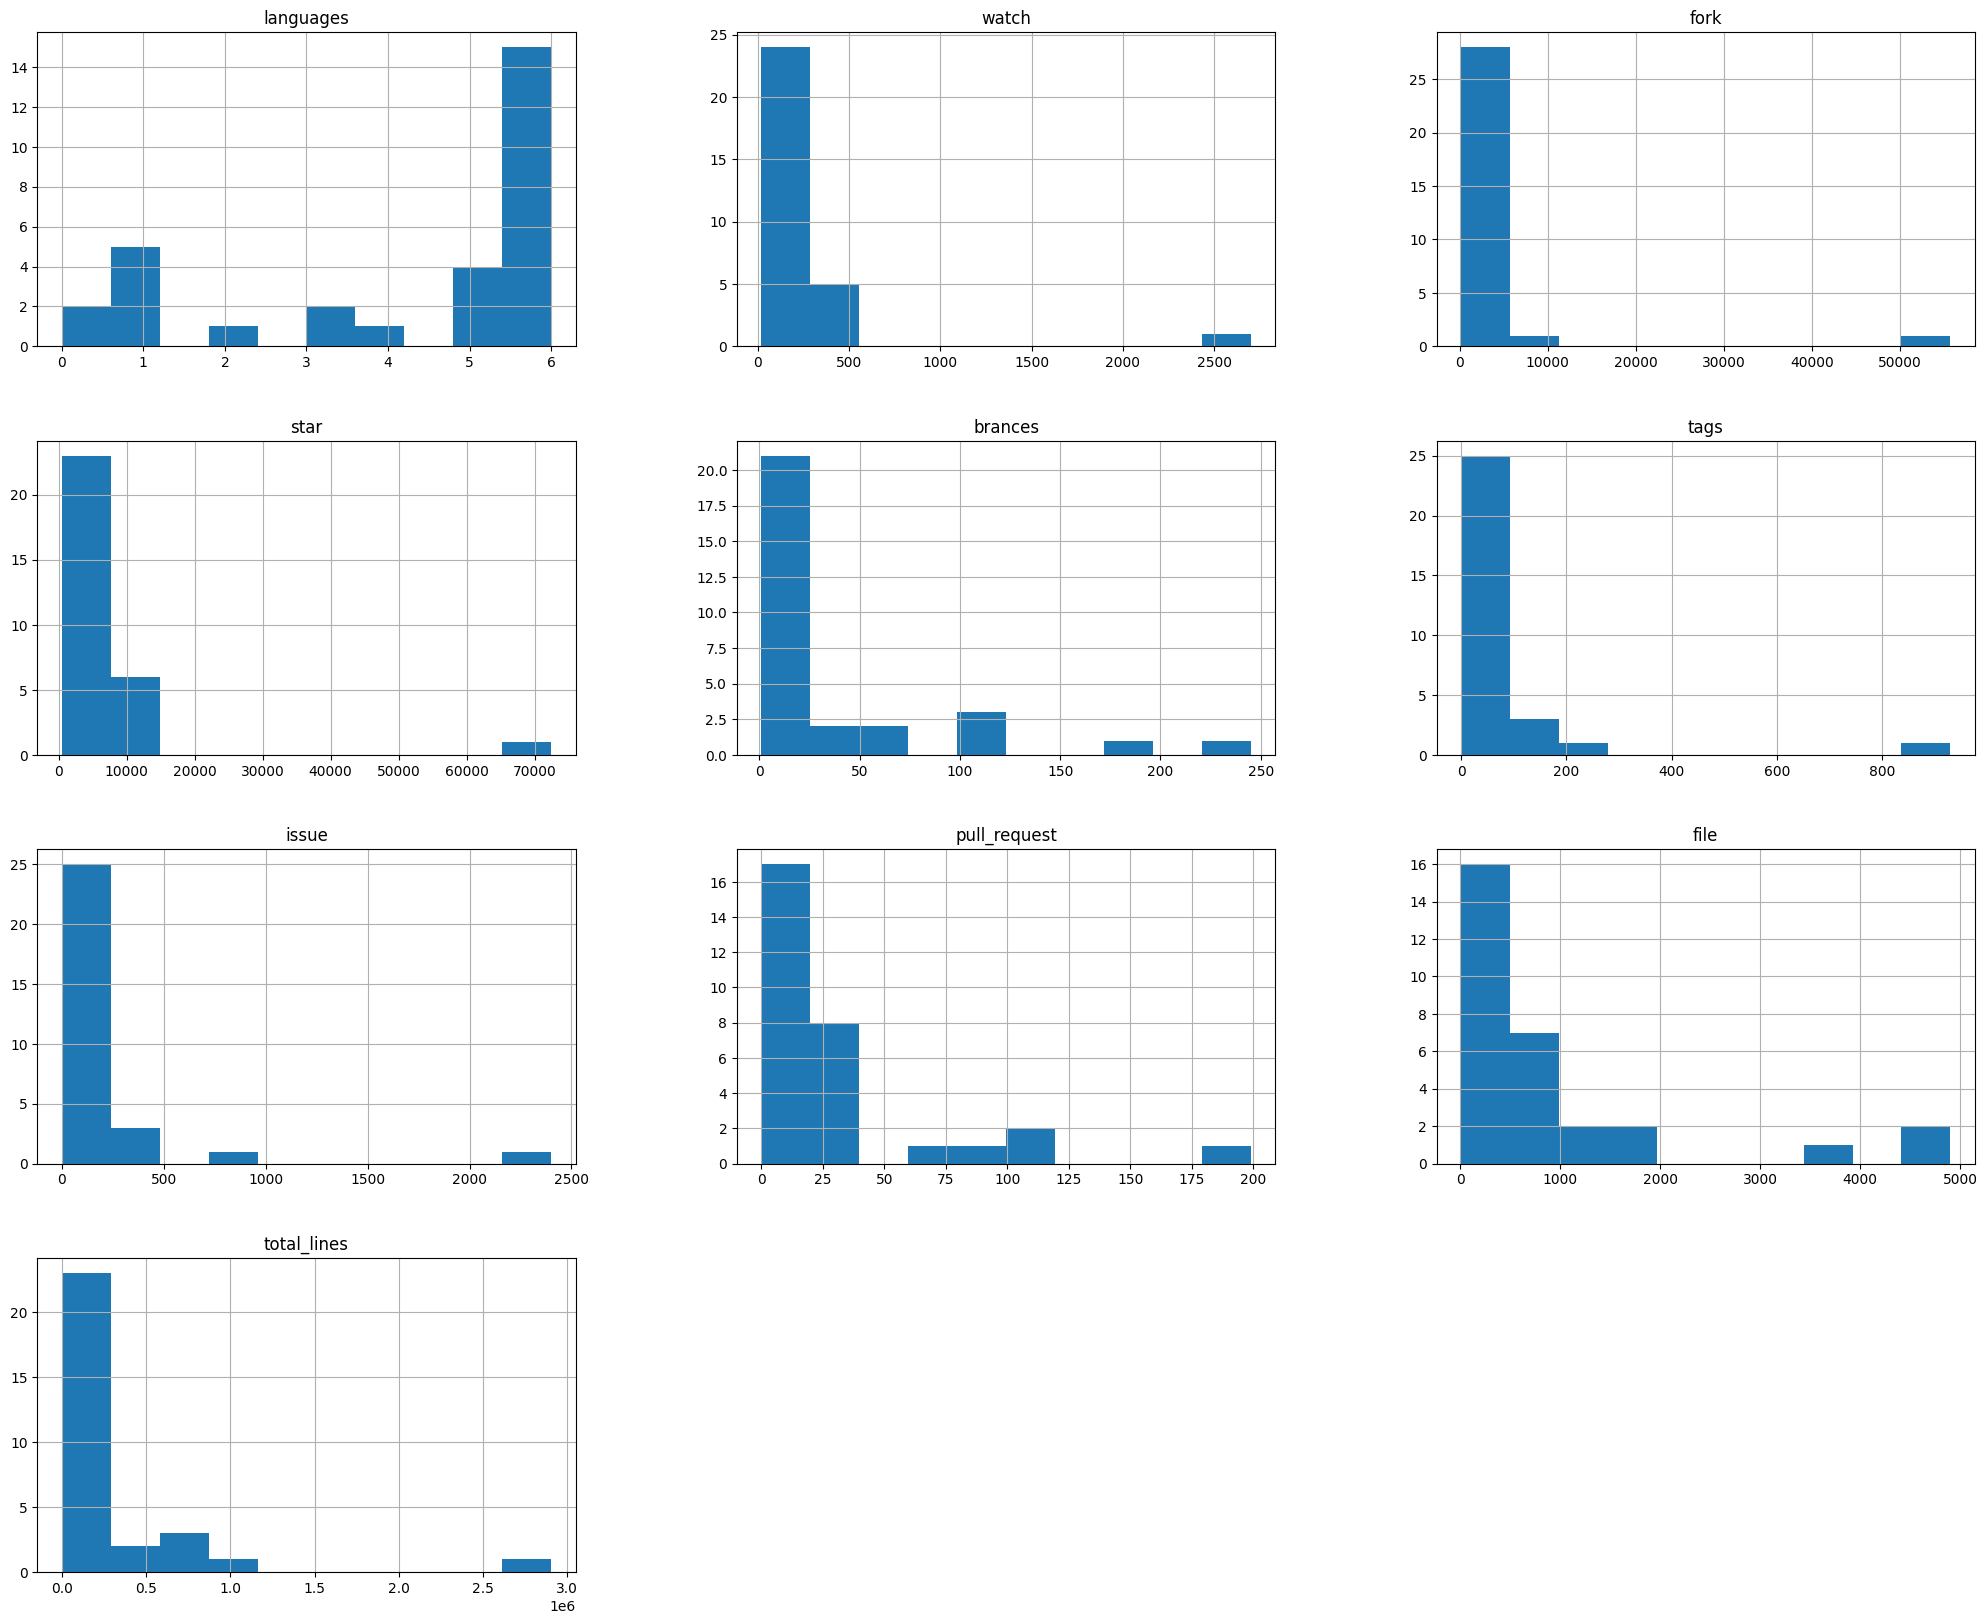

In [17]:
selected_columns = df.iloc[:, :10]

selected_columns.hist(bins=10, linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,20)
plt.show()

# Splitting The Data into Training And Testing Dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   languages          30 non-null     int32
 1   watch              30 non-null     int64
 2   fork               30 non-null     int64
 3   star               30 non-null     int64
 4   brances            30 non-null     int64
 5   tags               30 non-null     int64
 6   issue              30 non-null     int64
 7   pull_request       30 non-null     int64
 8   file               30 non-null     int64
 9   total_lines        30 non-null     int64
 10  line_code          30 non-null     int64
 11  line_comment       30 non-null     int64
 12  line_blank         30 non-null     int64
 13  class              30 non-null     int64
 14  function           30 non-null     int64
 15  pull_request2      30 non-null     int64
 16  files              30 non-null     int32
 17  active_branch     

In [26]:
# retrieve numpy array
dataset = df.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

# Normalisasi
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Clasification

In [27]:
# evaluation of a model using 4 features chosen with anova f-test
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
# Define stratified k-fold cross-validation with 10 splits
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
scoring = 'accuracy'

## Model

In [28]:
#SVM
model = SVC()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy : %.2f' % (accuracy*100))

Accuracy : 0.00


In [22]:
#LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy : %.2f' % (accuracy*100))

Accuracy : 0.00


In [23]:
#KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy : %.2f' % (accuracy*100))

Accuracy : 0.00


In [24]:
#RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy : %.2f' % (accuracy*100))

Accuracy : 0.00


In [25]:
#DecisionTree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy : %.2f' % (accuracy*100))

Accuracy : 0.00
